In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# first i loaded the dataset
df = pd.read_csv('C:/Users/MSI KATANA/Desktop/DSGP Git Repo/DSGP-GROUP-9/newDataset.csv')
df

,Accident_Index,Local_Authority_(District),Date,Day_of_Week,Time,Year,Weather_Conditions,Urban / Rural,Speed_limit,Road_Type,Road_Surface,Pedestrian_Crossing-Physical_Facilities,Number_of_Vehicles,Light_Conditions,Junction_Detail,Junction_Control,Accident_Severity
0,200501BS00001,Kensington and Chelsea,1/4/2005,Tuesday,17:42,2005,Raining no high winds,Urban,30,Single carriageway,Wet or damp,1.0,1,Daylight,Not at junction or within 20 metres,Data missing or out of range,Serious
1,200501BS00002,Kensington and Chelsea,1/5/2005,Wednesday,17:36,2005,Fine no high winds,Urban,30,Dual carriageway,Dry,5.0,1,Darkness - lights lit,Crossroads,Auto traffic signal,Slight
2,200501BS00003,Kensington and Chelsea,1/6/2005,Thursday,0:15,2005,Fine no high winds,Urban,30,Single carriageway,Dry,0.0,2,Darkness - lights lit,Not at junction or within 20 metres,Data missing or out of range,Slight
3,200501BS00004,Kensington and Chelsea,1/7/2005,Friday,10:35,2005,Fine no high winds,Urban,30,Single carriageway,Dry,0.0,1,Daylight,Not at junction or within 20 metres,Data missing or out of range,Slight
4,200501BS00005,Kensington and Chelsea,1/10/2005,Monday,21:13,2005,Fine no high winds,Urban,30,Single carriageway,Wet or damp,0.0,1,Darkness - lighting unknown,Not at junction or within 20 metres,Data missing or out of range,Slight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,201091NM01760,Highland,2/18/2010,Thursday,7:00,2010,Fine no high winds,Rural,60,Single carriageway,Dry,0.0,1,Daylight,Not at junction or within 20 metres,Data missing or out of range,Slight
1048571,201091NM01881,Highland,2/21/2010,Sunday,3:00,2010,Fine no high winds,Rural,60,Single carriageway,Frost or ice,0.0,1,Darkness - no lighting,Not at junction or within 20 metres,Data missing or out of range,Slight
1048572,201091NM01935,Highland,2/23/2010,Tuesday,9:38,2010,Fine no high winds,Rural,30,Single carriageway,Frost or ice,0.0,3,Daylight,T or staggered junction,Give way or uncontrolled,Slight
1048573,201091NM01964,Highland,2/23/2010,Tuesday,18:25,2010,Fine no high winds,Rural,60,Single carriageway,Wet or damp,0.0,2,Darkness - no lighting,T or staggered junction,Give way or uncontrolled,Serious


In [3]:
# Checking  missing values in the DataFrame
missing_values_in_data_frame = df.isnull()

# number of missing values in each column
missing_values_count_in_data_frame = df.isnull().sum()

# result
print("Missing Values in Each Column:")
print(missing_values_count_in_data_frame)

Missing Values in Each Column:
Accident_Index                               0
Local_Authority_(District)                   0
Date                                         0
Day_of_Week                                  0
Time                                       100
Year                                         0
Weather_Conditions                           0
Urban / Rural                                0
Speed_limit                                  0
Road_Type                                    0
Road_Surface                                 0
Pedestrian_Crossing-Physical_Facilities     37
Number_of_Vehicles                           0
Light_Conditions                             0
Junction_Detail                              0
Junction_Control                             0
Accident_Severity                            0
dtype: int64


In [4]:
# drop the rows with any missing values
df = df.dropna()
df

,Accident_Index,Local_Authority_(District),Date,Day_of_Week,Time,Year,Weather_Conditions,Urban / Rural,Speed_limit,Road_Type,Road_Surface,Pedestrian_Crossing-Physical_Facilities,Number_of_Vehicles,Light_Conditions,Junction_Detail,Junction_Control,Accident_Severity
0,200501BS00001,Kensington and Chelsea,1/4/2005,Tuesday,17:42,2005,Raining no high winds,Urban,30,Single carriageway,Wet or damp,1.0,1,Daylight,Not at junction or within 20 metres,Data missing or out of range,Serious
1,200501BS00002,Kensington and Chelsea,1/5/2005,Wednesday,17:36,2005,Fine no high winds,Urban,30,Dual carriageway,Dry,5.0,1,Darkness - lights lit,Crossroads,Auto traffic signal,Slight
2,200501BS00003,Kensington and Chelsea,1/6/2005,Thursday,0:15,2005,Fine no high winds,Urban,30,Single carriageway,Dry,0.0,2,Darkness - lights lit,Not at junction or within 20 metres,Data missing or out of range,Slight
3,200501BS00004,Kensington and Chelsea,1/7/2005,Friday,10:35,2005,Fine no high winds,Urban,30,Single carriageway,Dry,0.0,1,Daylight,Not at junction or within 20 metres,Data missing or out of range,Slight
4,200501BS00005,Kensington and Chelsea,1/10/2005,Monday,21:13,2005,Fine no high winds,Urban,30,Single carriageway,Wet or damp,0.0,1,Darkness - lighting unknown,Not at junction or within 20 metres,Data missing or out of range,Slight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,201091NM01760,Highland,2/18/2010,Thursday,7:00,2010,Fine no high winds,Rural,60,Single carriageway,Dry,0.0,1,Daylight,Not at junction or within 20 metres,Data missing or out of range,Slight
1048571,201091NM01881,Highland,2/21/2010,Sunday,3:00,2010,Fine no high winds,Rural,60,Single carriageway,Frost or ice,0.0,1,Darkness - no lighting,Not at junction or within 20 metres,Data missing or out of range,Slight
1048572,201091NM01935,Highland,2/23/2010,Tuesday,9:38,2010,Fine no high winds,Rural,30,Single carriageway,Frost or ice,0.0,3,Daylight,T or staggered junction,Give way or uncontrolled,Slight
1048573,201091NM01964,Highland,2/23/2010,Tuesday,18:25,2010,Fine no high winds,Rural,60,Single carriageway,Wet or damp,0.0,2,Darkness - no lighting,T or staggered junction,Give way or uncontrolled,Serious


In [5]:
# remove the duplicate values in rows 
df = df.drop_duplicates()
df

,Accident_Index,Local_Authority_(District),Date,Day_of_Week,Time,Year,Weather_Conditions,Urban / Rural,Speed_limit,Road_Type,Road_Surface,Pedestrian_Crossing-Physical_Facilities,Number_of_Vehicles,Light_Conditions,Junction_Detail,Junction_Control,Accident_Severity
0,200501BS00001,Kensington and Chelsea,1/4/2005,Tuesday,17:42,2005,Raining no high winds,Urban,30,Single carriageway,Wet or damp,1.0,1,Daylight,Not at junction or within 20 metres,Data missing or out of range,Serious
1,200501BS00002,Kensington and Chelsea,1/5/2005,Wednesday,17:36,2005,Fine no high winds,Urban,30,Dual carriageway,Dry,5.0,1,Darkness - lights lit,Crossroads,Auto traffic signal,Slight
2,200501BS00003,Kensington and Chelsea,1/6/2005,Thursday,0:15,2005,Fine no high winds,Urban,30,Single carriageway,Dry,0.0,2,Darkness - lights lit,Not at junction or within 20 metres,Data missing or out of range,Slight
3,200501BS00004,Kensington and Chelsea,1/7/2005,Friday,10:35,2005,Fine no high winds,Urban,30,Single carriageway,Dry,0.0,1,Daylight,Not at junction or within 20 metres,Data missing or out of range,Slight
4,200501BS00005,Kensington and Chelsea,1/10/2005,Monday,21:13,2005,Fine no high winds,Urban,30,Single carriageway,Wet or damp,0.0,1,Darkness - lighting unknown,Not at junction or within 20 metres,Data missing or out of range,Slight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,201091NM01760,Highland,2/18/2010,Thursday,7:00,2010,Fine no high winds,Rural,60,Single carriageway,Dry,0.0,1,Daylight,Not at junction or within 20 metres,Data missing or out of range,Slight
1048571,201091NM01881,Highland,2/21/2010,Sunday,3:00,2010,Fine no high winds,Rural,60,Single carriageway,Frost or ice,0.0,1,Darkness - no lighting,Not at junction or within 20 metres,Data missing or out of range,Slight
1048572,201091NM01935,Highland,2/23/2010,Tuesday,9:38,2010,Fine no high winds,Rural,30,Single carriageway,Frost or ice,0.0,3,Daylight,T or staggered junction,Give way or uncontrolled,Slight
1048573,201091NM01964,Highland,2/23/2010,Tuesday,18:25,2010,Fine no high winds,Rural,60,Single carriageway,Wet or damp,0.0,2,Darkness - no lighting,T or staggered junction,Give way or uncontrolled,Serious


In [6]:
# Checking  missing values in the DataFrame
missing_values_in_data_frame = df.isnull()

# number of missing values in each column
missing_values_count_in_data_frame = df.isnull().sum()

# result
print("Missing Values in Each Column:")
print(missing_values_count_in_data_frame)

Missing Values in Each Column:
Accident_Index                             0
Local_Authority_(District)                 0
Date                                       0
Day_of_Week                                0
Time                                       0
Year                                       0
Weather_Conditions                         0
Urban / Rural                              0
Speed_limit                                0
Road_Type                                  0
Road_Surface                               0
Pedestrian_Crossing-Physical_Facilities    0
Number_of_Vehicles                         0
Light_Conditions                           0
Junction_Detail                            0
Junction_Control                           0
Accident_Severity                          0
dtype: int64


In [7]:
# mainly selected fields
selected_columns = ['Accident_Index', 'Date', 'Day_of_Week', 'Time', 'Local_Authority_(District)', 'Weather_Conditions', 'Light_Conditions'] 
df_selected = df[selected_columns]
df_selected

,Accident_Index,Date,Day_of_Week,Time,Local_Authority_(District),Weather_Conditions,Light_Conditions
0,200501BS00001,1/4/2005,Tuesday,17:42,Kensington and Chelsea,Raining no high winds,Daylight
1,200501BS00002,1/5/2005,Wednesday,17:36,Kensington and Chelsea,Fine no high winds,Darkness - lights lit
2,200501BS00003,1/6/2005,Thursday,0:15,Kensington and Chelsea,Fine no high winds,Darkness - lights lit
3,200501BS00004,1/7/2005,Friday,10:35,Kensington and Chelsea,Fine no high winds,Daylight
4,200501BS00005,1/10/2005,Monday,21:13,Kensington and Chelsea,Fine no high winds,Darkness - lighting unknown
...,...,...,...,...,...,...,...
1048570,201091NM01760,2/18/2010,Thursday,7:00,Highland,Fine no high winds,Daylight
1048571,201091NM01881,2/21/2010,Sunday,3:00,Highland,Fine no high winds,Darkness - no lighting
1048572,201091NM01935,2/23/2010,Tuesday,9:38,Highland,Fine no high winds,Daylight
1048573,201091NM01964,2/23/2010,Tuesday,18:25,Highland,Fine no high winds,Darkness - no lighting


In [8]:
df_selected['Date'] = pd.to_datetime(df_selected['Date'])  # Convert 'Date' column to datetime format

# new column for the numeric month
df_selected['Month_Numeric'] = df_selected['Date'].dt.month

# new column for the month name
df_selected['Month_Name'] = df_selected['Date'].dt.strftime('%B')

df_selected

C:\Users\MSI KATANA\AppData\Local\Temp\ipykernel_1328\4197322449.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Date'] = pd.to_datetime(df_selected['Date'])  # Convert 'Date' column to datetime format
C:\Users\MSI KATANA\AppData\Local\Temp\ipykernel_1328\4197322449.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Month_Numeric'] = df_selected['Date'].dt.month
C:\Users\MSI KATANA\AppData\Local\Temp\ipykernel_1328\4197322449.py:7: SettingWithCopyWarning: 
A value is trying to

,Accident_Index,Date,Day_of_Week,Time,Local_Authority_(District),Weather_Conditions,Light_Conditions,Month_Numeric,Month_Name
0,200501BS00001,2005-01-04,Tuesday,17:42,Kensington and Chelsea,Raining no high winds,Daylight,1,January
1,200501BS00002,2005-01-05,Wednesday,17:36,Kensington and Chelsea,Fine no high winds,Darkness - lights lit,1,January
2,200501BS00003,2005-01-06,Thursday,0:15,Kensington and Chelsea,Fine no high winds,Darkness - lights lit,1,January
3,200501BS00004,2005-01-07,Friday,10:35,Kensington and Chelsea,Fine no high winds,Daylight,1,January
4,200501BS00005,2005-01-10,Monday,21:13,Kensington and Chelsea,Fine no high winds,Darkness - lighting unknown,1,January
...,...,...,...,...,...,...,...,...,...
1048570,201091NM01760,2010-02-18,Thursday,7:00,Highland,Fine no high winds,Daylight,2,February
1048571,201091NM01881,2010-02-21,Sunday,3:00,Highland,Fine no high winds,Darkness - no lighting,2,February
1048572,201091NM01935,2010-02-23,Tuesday,9:38,Highland,Fine no high winds,Daylight,2,February
1048573,201091NM01964,2010-02-23,Tuesday,18:25,Highland,Fine no high winds,Darkness - no lighting,2,February


In [9]:
# Assuming 'Date' is the name of the column with date values
df_selected['Date'] = pd.to_datetime(df_selected['Date']).dt.day
df_selected

C:\Users\MSI KATANA\AppData\Local\Temp\ipykernel_1328\1884732459.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Date'] = pd.to_datetime(df_selected['Date']).dt.day


,Accident_Index,Date,Day_of_Week,Time,Local_Authority_(District),Weather_Conditions,Light_Conditions,Month_Numeric,Month_Name
0,200501BS00001,4,Tuesday,17:42,Kensington and Chelsea,Raining no high winds,Daylight,1,January
1,200501BS00002,5,Wednesday,17:36,Kensington and Chelsea,Fine no high winds,Darkness - lights lit,1,January
2,200501BS00003,6,Thursday,0:15,Kensington and Chelsea,Fine no high winds,Darkness - lights lit,1,January
3,200501BS00004,7,Friday,10:35,Kensington and Chelsea,Fine no high winds,Daylight,1,January
4,200501BS00005,10,Monday,21:13,Kensington and Chelsea,Fine no high winds,Darkness - lighting unknown,1,January
...,...,...,...,...,...,...,...,...,...
1048570,201091NM01760,18,Thursday,7:00,Highland,Fine no high winds,Daylight,2,February
1048571,201091NM01881,21,Sunday,3:00,Highland,Fine no high winds,Darkness - no lighting,2,February
1048572,201091NM01935,23,Tuesday,9:38,Highland,Fine no high winds,Daylight,2,February
1048573,201091NM01964,23,Tuesday,18:25,Highland,Fine no high winds,Darkness - no lighting,2,February


In [10]:
# Drop unwanted columns
columns_to_drop2 = ['Month_Name']
df_selected = df_selected.drop(columns=columns_to_drop2, errors='ignore')
df_selected

,Accident_Index,Date,Day_of_Week,Time,Local_Authority_(District),Weather_Conditions,Light_Conditions,Month_Numeric
0,200501BS00001,4,Tuesday,17:42,Kensington and Chelsea,Raining no high winds,Daylight,1
1,200501BS00002,5,Wednesday,17:36,Kensington and Chelsea,Fine no high winds,Darkness - lights lit,1
2,200501BS00003,6,Thursday,0:15,Kensington and Chelsea,Fine no high winds,Darkness - lights lit,1
3,200501BS00004,7,Friday,10:35,Kensington and Chelsea,Fine no high winds,Daylight,1
4,200501BS00005,10,Monday,21:13,Kensington and Chelsea,Fine no high winds,Darkness - lighting unknown,1
...,...,...,...,...,...,...,...,...
1048570,201091NM01760,18,Thursday,7:00,Highland,Fine no high winds,Daylight,2
1048571,201091NM01881,21,Sunday,3:00,Highland,Fine no high winds,Darkness - no lighting,2
1048572,201091NM01935,23,Tuesday,9:38,Highland,Fine no high winds,Daylight,2
1048573,201091NM01964,23,Tuesday,18:25,Highland,Fine no high winds,Darkness - no lighting,2


In [11]:
df_selected['Time'] = pd.to_datetime(df_selected['Time'], format='%H:%M', errors='coerce')

# Extract the hour in the day to create the other column
df_selected['Hour_of_Day'] = df_selected['Time'].dt.hour

df_selected

,Accident_Index,Date,Day_of_Week,Time,Local_Authority_(District),Weather_Conditions,Light_Conditions,Month_Numeric,Hour_of_Day
0,200501BS00001,4,Tuesday,1900-01-01 17:42:00,Kensington and Chelsea,Raining no high winds,Daylight,1,17
1,200501BS00002,5,Wednesday,1900-01-01 17:36:00,Kensington and Chelsea,Fine no high winds,Darkness - lights lit,1,17
2,200501BS00003,6,Thursday,1900-01-01 00:15:00,Kensington and Chelsea,Fine no high winds,Darkness - lights lit,1,0
3,200501BS00004,7,Friday,1900-01-01 10:35:00,Kensington and Chelsea,Fine no high winds,Daylight,1,10
4,200501BS00005,10,Monday,1900-01-01 21:13:00,Kensington and Chelsea,Fine no high winds,Darkness - lighting unknown,1,21
...,...,...,...,...,...,...,...,...,...
1048570,201091NM01760,18,Thursday,1900-01-01 07:00:00,Highland,Fine no high winds,Daylight,2,7
1048571,201091NM01881,21,Sunday,1900-01-01 03:00:00,Highland,Fine no high winds,Darkness - no lighting,2,3
1048572,201091NM01935,23,Tuesday,1900-01-01 09:38:00,Highland,Fine no high winds,Daylight,2,9
1048573,201091NM01964,23,Tuesday,1900-01-01 18:25:00,Highland,Fine no high winds,Darkness - no lighting,2,18


In [12]:
# Checking  missing values in the DataFrame
missing_values_in_data_frame = df_selected.isnull()

# number of missing values in each column
missing_values_count_in_data_frame = df_selected.isnull().sum()

#result
print("Missing Values in Each Column:")
print(missing_values_count_in_data_frame)

Missing Values in Each Column:
Accident_Index                0
Date                          0
Day_of_Week                   0
Time                          0
Local_Authority_(District)    0
Weather_Conditions            0
Light_Conditions              0
Month_Numeric                 0
Hour_of_Day                   0
dtype: int64


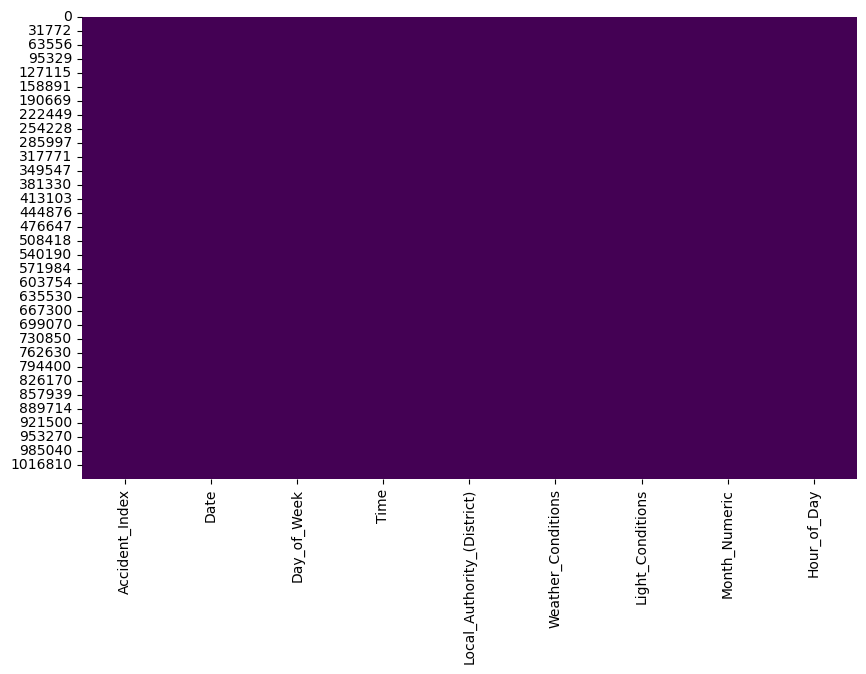

In [13]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_selected.isnull(), cbar=False, cmap='viridis')
plt.show()

# here if there are any missing value we can see it in yellow color

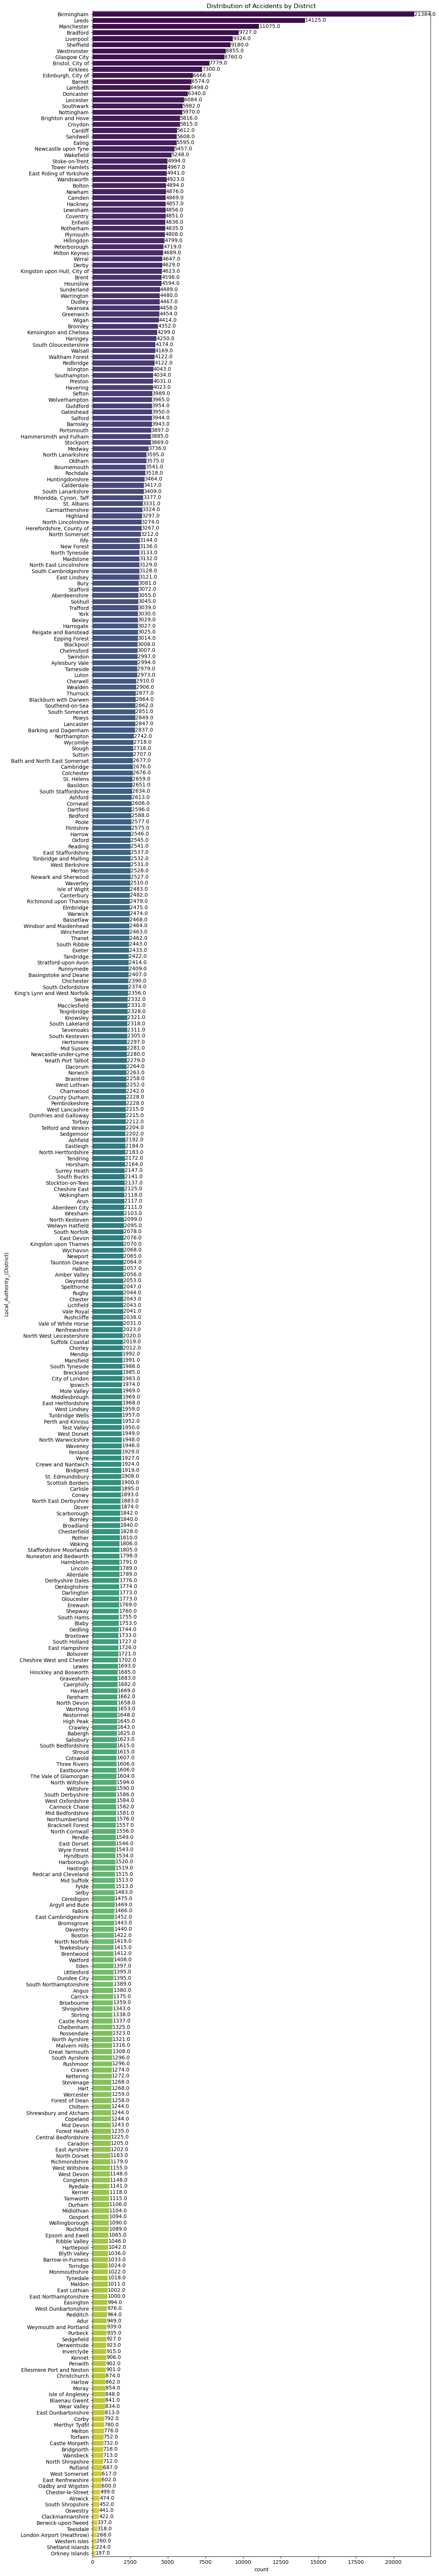

In [14]:
plt.figure(figsize=(12, 70)) 
ax = sns.countplot(y='Local_Authority_(District)', data=df, palette='viridis', order=df['Local_Authority_(District)'].value_counts().index)
plt.title('Distribution of Accidents by District')


for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width() + 0.1, p.get_y() + p.get_height() / 2), ha='left', va='center')

plt.tight_layout() 
plt.show()


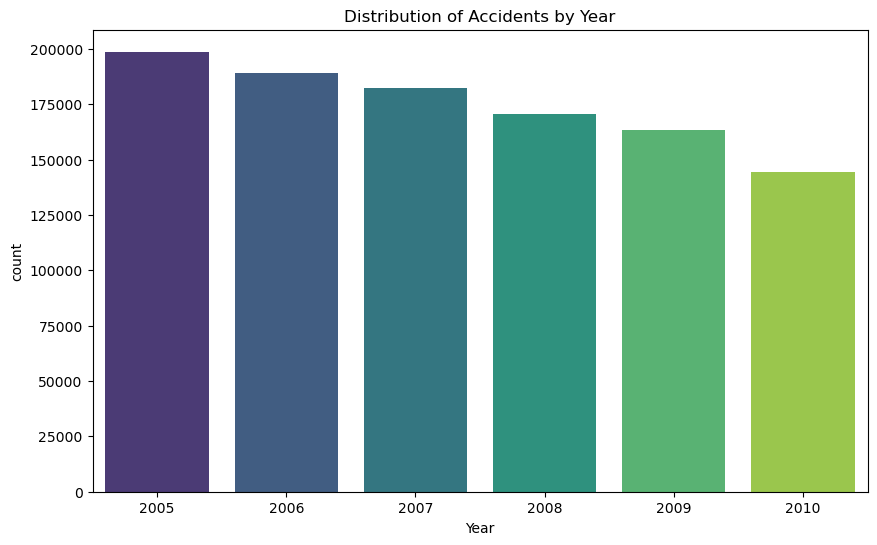

In [15]:
# 'Year'
plt.figure(figsize=(10, 6))
sns.countplot(x='Year', data=df, palette='viridis')
plt.title('Distribution of Accidents by Year')
plt.show()

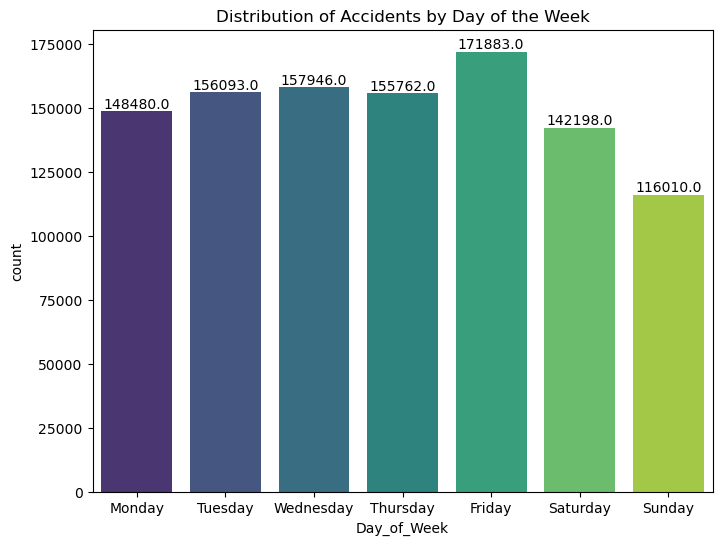

In [16]:
# 'Day_of_the_Week'
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Day_of_Week', data=df, palette='viridis', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Distribution of Accidents by Day of the Week')


for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height() + 0.1), ha='center', va='bottom')

plt.show()

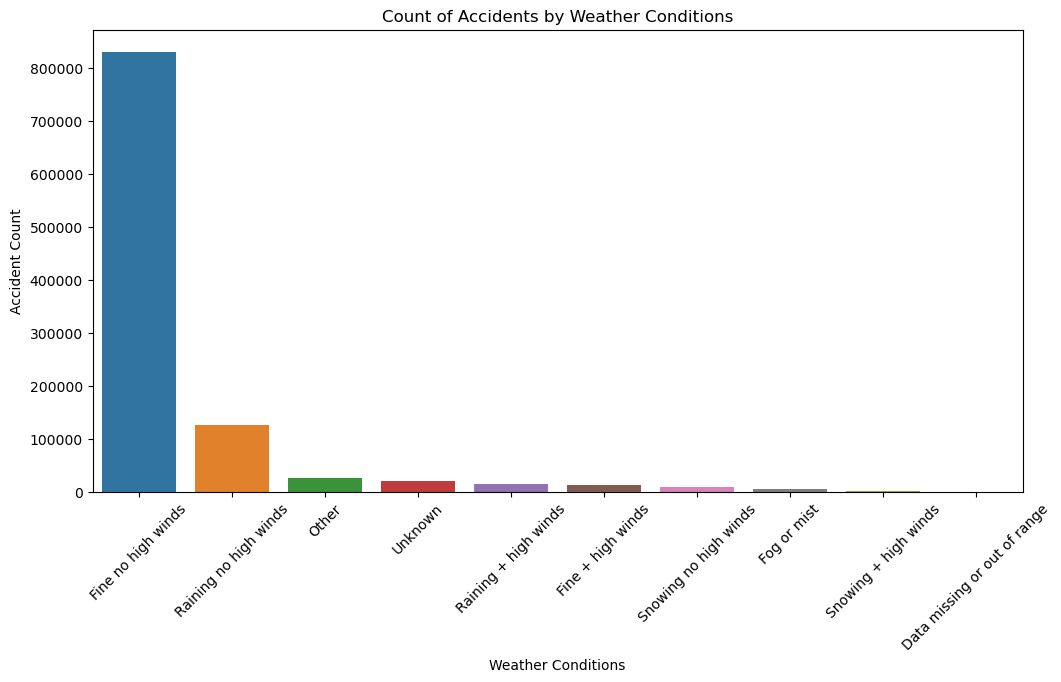

In [17]:
# Count vs Weather Conditions
plt.figure(figsize=(12, 6))
sns.countplot(x='Weather_Conditions', data=df, order=df['Weather_Conditions'].value_counts().index)
plt.title('Count of Accidents by Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Accident Count')
plt.xticks(rotation=45)
plt.show()

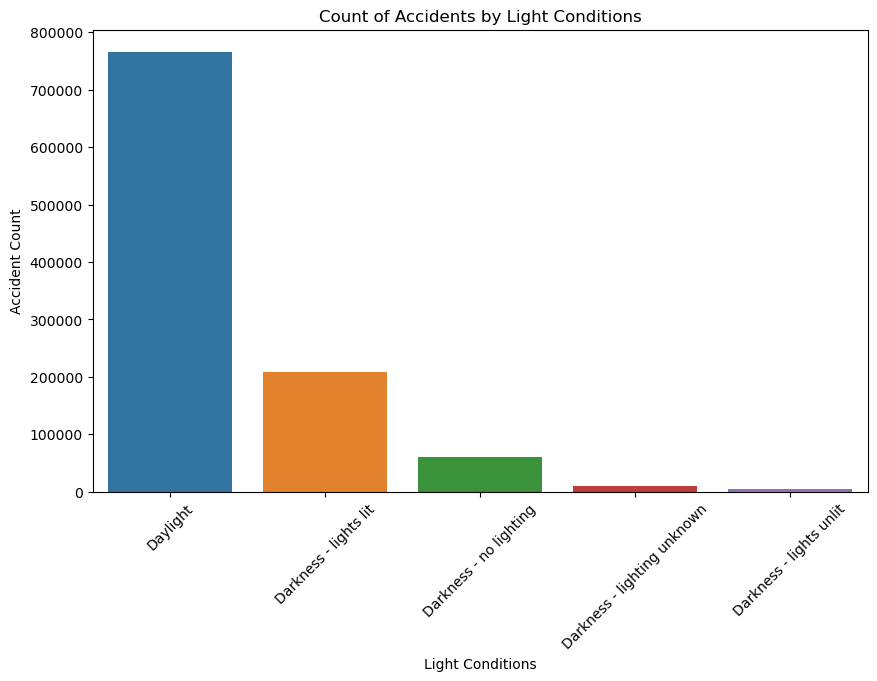

In [18]:
# Count vs Light Conditions
plt.figure(figsize=(10, 6))
sns.countplot(x='Light_Conditions', data=df, order=df['Light_Conditions'].value_counts().index)
plt.title('Count of Accidents by Light Conditions')
plt.xlabel('Light Conditions')
plt.ylabel('Accident Count')
plt.xticks(rotation=45)
plt.show()

In [19]:
df_selected

,Accident_Index,Date,Day_of_Week,Time,Local_Authority_(District),Weather_Conditions,Light_Conditions,Month_Numeric,Hour_of_Day
0,200501BS00001,4,Tuesday,1900-01-01 17:42:00,Kensington and Chelsea,Raining no high winds,Daylight,1,17
1,200501BS00002,5,Wednesday,1900-01-01 17:36:00,Kensington and Chelsea,Fine no high winds,Darkness - lights lit,1,17
2,200501BS00003,6,Thursday,1900-01-01 00:15:00,Kensington and Chelsea,Fine no high winds,Darkness - lights lit,1,0
3,200501BS00004,7,Friday,1900-01-01 10:35:00,Kensington and Chelsea,Fine no high winds,Daylight,1,10
4,200501BS00005,10,Monday,1900-01-01 21:13:00,Kensington and Chelsea,Fine no high winds,Darkness - lighting unknown,1,21
...,...,...,...,...,...,...,...,...,...
1048570,201091NM01760,18,Thursday,1900-01-01 07:00:00,Highland,Fine no high winds,Daylight,2,7
1048571,201091NM01881,21,Sunday,1900-01-01 03:00:00,Highland,Fine no high winds,Darkness - no lighting,2,3
1048572,201091NM01935,23,Tuesday,1900-01-01 09:38:00,Highland,Fine no high winds,Daylight,2,9
1048573,201091NM01964,23,Tuesday,1900-01-01 18:25:00,Highland,Fine no high winds,Darkness - no lighting,2,18


In [20]:
df_selected['Day_of_Week'].unique()

array(['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Monday', 'Saturday',
       'Sunday'], dtype=object)

In [21]:
for unique_value in sorted(df_selected['Local_Authority_(District)'].unique()):
    print(unique_value)

Aberdeen City
Aberdeenshire
Adur
Allerdale
Alnwick
Amber Valley
Angus
Argyll and Bute
Arun
Ashfield
Ashford
Aylesbury Vale
Babergh
Barking and Dagenham
Barnet
Barnsley
Barrow-in-Furness
Basildon
Basingstoke and Deane
Bassetlaw
Bath and North East Somerset
Bedford
Berwick-upon-Tweed
Bexley
Birmingham
Blaby
Blackburn with Darwen
Blackpool
Blaenau Gwent
Blyth Valley
Bolsover
Bolton
Boston
Bournemouth
Bracknell Forest
Bradford
Braintree
Breckland
Brent
Brentwood
Bridgend
Bridgnorth
Brighton and Hove
Bristol, City of
Broadland
Bromley
Bromsgrove
Broxbourne
Broxtowe
Burnley
Bury
Caerphilly
Calderdale
Cambridge
Camden
Cannock Chase
Canterbury
Caradon
Cardiff
Carlisle
Carmarthenshire
Carrick
Castle Morpeth
Castle Point
Central Bedfordshire
Ceredigion
Charnwood
Chelmsford
Cheltenham
Cherwell
Cheshire East
Cheshire West and Chester
Chester
Chester-le-Street
Chesterfield
Chichester
Chiltern
Chorley
Christchurch
City of London
Clackmannanshire
Colchester
Congleton
Conwy
Copeland
Corby
Cornwall
Cot

In [22]:
df_selected['Light_Conditions'].unique()

array(['Daylight', 'Darkness - lights lit', 'Darkness - lighting unknown',
       'Darkness - lights unlit', 'Darkness - no lighting'], dtype=object)

In [23]:
df_selected['Month_Numeric'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [24]:
df_selected['Hour_of_Day'].unique()

array([17,  0, 10, 21, 12, 20, 22, 16,  5, 11,  9,  3,  7, 13, 18, 15, 23,
        8, 14, 19,  1,  4,  2,  6])

In [25]:
df_selected['Weather_Conditions'].unique()

array(['Raining no high winds', 'Fine no high winds', 'Unknown',
       'Snowing no high winds', 'Other', 'Fine + high winds',
       'Raining + high winds', 'Fog or mist', 'Snowing + high winds',
       'Data missing or out of range'], dtype=object)

In [26]:
# List of values to remove
values_to_remove = ['Unknown', 'Other', 'Data missing or out of range']

# Filter the DataFrame to exclude rows with specified values
df_selected = df_selected[~df_selected['Weather_Conditions'].isin(values_to_remove)]

df_selected

,Accident_Index,Date,Day_of_Week,Time,Local_Authority_(District),Weather_Conditions,Light_Conditions,Month_Numeric,Hour_of_Day
0,200501BS00001,4,Tuesday,1900-01-01 17:42:00,Kensington and Chelsea,Raining no high winds,Daylight,1,17
1,200501BS00002,5,Wednesday,1900-01-01 17:36:00,Kensington and Chelsea,Fine no high winds,Darkness - lights lit,1,17
2,200501BS00003,6,Thursday,1900-01-01 00:15:00,Kensington and Chelsea,Fine no high winds,Darkness - lights lit,1,0
3,200501BS00004,7,Friday,1900-01-01 10:35:00,Kensington and Chelsea,Fine no high winds,Daylight,1,10
4,200501BS00005,10,Monday,1900-01-01 21:13:00,Kensington and Chelsea,Fine no high winds,Darkness - lighting unknown,1,21
...,...,...,...,...,...,...,...,...,...
1048570,201091NM01760,18,Thursday,1900-01-01 07:00:00,Highland,Fine no high winds,Daylight,2,7
1048571,201091NM01881,21,Sunday,1900-01-01 03:00:00,Highland,Fine no high winds,Darkness - no lighting,2,3
1048572,201091NM01935,23,Tuesday,1900-01-01 09:38:00,Highland,Fine no high winds,Daylight,2,9
1048573,201091NM01964,23,Tuesday,1900-01-01 18:25:00,Highland,Fine no high winds,Darkness - no lighting,2,18


In [27]:
df_selected['Weather_Conditions'].unique()

array(['Raining no high winds', 'Fine no high winds',
       'Snowing no high winds', 'Fine + high winds',
       'Raining + high winds', 'Fog or mist', 'Snowing + high winds'],
      dtype=object)

In [28]:
columns_to_drop2 = ['Time']
df_selected = df_selected.drop(columns=columns_to_drop2, errors='ignore')
df_selected


,Accident_Index,Date,Day_of_Week,Local_Authority_(District),Weather_Conditions,Light_Conditions,Month_Numeric,Hour_of_Day
0,200501BS00001,4,Tuesday,Kensington and Chelsea,Raining no high winds,Daylight,1,17
1,200501BS00002,5,Wednesday,Kensington and Chelsea,Fine no high winds,Darkness - lights lit,1,17
2,200501BS00003,6,Thursday,Kensington and Chelsea,Fine no high winds,Darkness - lights lit,1,0
3,200501BS00004,7,Friday,Kensington and Chelsea,Fine no high winds,Daylight,1,10
4,200501BS00005,10,Monday,Kensington and Chelsea,Fine no high winds,Darkness - lighting unknown,1,21
...,...,...,...,...,...,...,...,...
1048570,201091NM01760,18,Thursday,Highland,Fine no high winds,Daylight,2,7
1048571,201091NM01881,21,Sunday,Highland,Fine no high winds,Darkness - no lighting,2,3
1048572,201091NM01935,23,Tuesday,Highland,Fine no high winds,Daylight,2,9
1048573,201091NM01964,23,Tuesday,Highland,Fine no high winds,Darkness - no lighting,2,18


In [29]:
df_selected['Accident_Count'] = df_selected.groupby(['Day_of_Week', 'Local_Authority_(District)', 'Weather_Conditions', 'Light_Conditions', 'Hour_of_Day', 'Month_Numeric'])['Accident_Index'].transform('count')

# reset the index
df_selected = df_selected.reset_index(drop=True)

df_selected

,Accident_Index,Date,Day_of_Week,Local_Authority_(District),Weather_Conditions,Light_Conditions,Month_Numeric,Hour_of_Day,Accident_Count
0,200501BS00001,4,Tuesday,Kensington and Chelsea,Raining no high winds,Daylight,1,17,1
1,200501BS00002,5,Wednesday,Kensington and Chelsea,Fine no high winds,Darkness - lights lit,1,17,3
2,200501BS00003,6,Thursday,Kensington and Chelsea,Fine no high winds,Darkness - lights lit,1,0,2
3,200501BS00004,7,Friday,Kensington and Chelsea,Fine no high winds,Daylight,1,10,1
4,200501BS00005,10,Monday,Kensington and Chelsea,Fine no high winds,Darkness - lighting unknown,1,21,1
...,...,...,...,...,...,...,...,...,...
1000507,201091NM01760,18,Thursday,Highland,Fine no high winds,Daylight,2,7,1
1000508,201091NM01881,21,Sunday,Highland,Fine no high winds,Darkness - no lighting,2,3,1
1000509,201091NM01935,23,Tuesday,Highland,Fine no high winds,Daylight,2,9,4
1000510,201091NM01964,23,Tuesday,Highland,Fine no high winds,Darkness - no lighting,2,18,2


In [30]:
df_selected['Accident_Count'].unique()

array([ 1,  3,  2,  4,  6,  5,  7,  8, 10, 15, 12,  9, 11, 16, 14, 13, 18,
       17, 19, 20, 21, 25, 22, 24, 27, 23, 29, 32, 28, 26, 31, 30],
      dtype=int64)

In [31]:
df_selected.describe()


,Date,Month_Numeric,Hour_of_Day,Accident_Count
count,1.000512e+06,1.000512e+06,1.000512e+06,1.000512e+06
mean,1.560530e+01,6.626195e+00,1.362100e+01,2.865847e+00
std,8.751401e+00,3.398093e+00,5.174610e+00,2.684966e+00
min,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
25%,8.000000e+00,4.000000e+00,1.000000e+01,1.000000e+00
50%,1.600000e+01,7.000000e+00,1.400000e+01,2.000000e+00
75%,2.300000e+01,1.000000e+01,1.700000e+01,4.000000e+00
max,3.100000e+01,1.200000e+01,2.300000e+01,3.200000e+01


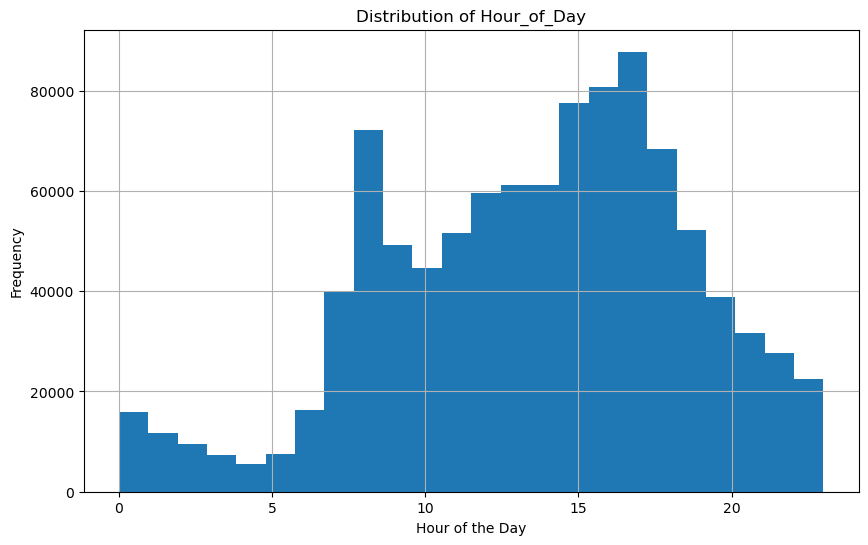

In [32]:
df_selected['Hour_of_Day'].hist(bins=24, figsize=(10, 6))
plt.title('Distribution of Hour_of_Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.show()

In [33]:
# observations from the correlation metrix
   # slightly more accidents during the day than at night
   # there are slightly fewer accidents on weekends than on weekdays
   # there are slightly fewer accidents when the weather is bad
   # slightly more accidents when it is dark

In [34]:
columns_to_drop2 = ['Accident_Index']
df_selected = df_selected.drop(columns=columns_to_drop2, errors='ignore')
df_selected


,Date,Day_of_Week,Local_Authority_(District),Weather_Conditions,Light_Conditions,Month_Numeric,Hour_of_Day,Accident_Count
0,4,Tuesday,Kensington and Chelsea,Raining no high winds,Daylight,1,17,1
1,5,Wednesday,Kensington and Chelsea,Fine no high winds,Darkness - lights lit,1,17,3
2,6,Thursday,Kensington and Chelsea,Fine no high winds,Darkness - lights lit,1,0,2
3,7,Friday,Kensington and Chelsea,Fine no high winds,Daylight,1,10,1
4,10,Monday,Kensington and Chelsea,Fine no high winds,Darkness - lighting unknown,1,21,1
...,...,...,...,...,...,...,...,...
1000507,18,Thursday,Highland,Fine no high winds,Daylight,2,7,1
1000508,21,Sunday,Highland,Fine no high winds,Darkness - no lighting,2,3,1
1000509,23,Tuesday,Highland,Fine no high winds,Daylight,2,9,4
1000510,23,Tuesday,Highland,Fine no high winds,Darkness - no lighting,2,18,2


In [35]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Assuming df_selected is your DataFrame
df_selected['Day_of_Week_Encoded'] = label_encoder.fit_transform(df_selected['Day_of_Week'])
df_selected['Local_Authority_(District)_Encoded'] = label_encoder.fit_transform(df_selected['Local_Authority_(District)'])
df_selected['Weather_Conditions_Encoded'] = label_encoder.fit_transform(df_selected['Weather_Conditions'])
df_selected['Light_Conditions_Encoded'] = label_encoder.fit_transform(df_selected['Light_Conditions'])

# Print the DataFrame with the added encoded columns
df_selected


,Date,Day_of_Week,Local_Authority_(District),Weather_Conditions,Light_Conditions,Month_Numeric,Hour_of_Day,Accident_Count,Day_of_Week_Encoded,Local_Authority_(District)_Encoded,Weather_Conditions_Encoded,Light_Conditions_Encoded
0,4,Tuesday,Kensington and Chelsea,Raining no high winds,Daylight,1,17,1,5,182,4,4
1,5,Wednesday,Kensington and Chelsea,Fine no high winds,Darkness - lights lit,1,17,3,6,182,1,1
2,6,Thursday,Kensington and Chelsea,Fine no high winds,Darkness - lights lit,1,0,2,4,182,1,1
3,7,Friday,Kensington and Chelsea,Fine no high winds,Daylight,1,10,1,0,182,1,4
4,10,Monday,Kensington and Chelsea,Fine no high winds,Darkness - lighting unknown,1,21,1,1,182,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1000507,18,Thursday,Highland,Fine no high winds,Daylight,2,7,1,4,169,1,4
1000508,21,Sunday,Highland,Fine no high winds,Darkness - no lighting,2,3,1,3,169,1,3
1000509,23,Tuesday,Highland,Fine no high winds,Daylight,2,9,4,5,169,1,4
1000510,23,Tuesday,Highland,Fine no high winds,Darkness - no lighting,2,18,2,5,169,1,3


In [36]:
import pandas as pd

data = df_selected[['Local_Authority_(District)', 'Local_Authority_(District)_Encoded']]

df = pd.DataFrame(data)

# Drop duplicates
unique_values_df = df.drop_duplicates().reset_index(drop=True)


print(unique_values_df)


    Local_Authority_(District)  Local_Authority_(District)_Encoded
0       Kensington and Chelsea                                 182
1       Hammersmith and Fulham                                 155
2                  Westminster                                 398
3               City of London                                  79
4                Tower Hamlets                                 366
..                         ...                                 ...
411              County Durham                                  88
412                 Shropshire                                 303
413       Central Bedfordshire                                  64
414                   Cornwall                                  86
415                  Wiltshire                                 401

[416 rows x 2 columns]


In [37]:
unique_values_df = unique_values_df.drop_duplicates().reset_index(drop=True)


print(unique_values_df)


    Local_Authority_(District)  Local_Authority_(District)_Encoded
0       Kensington and Chelsea                                 182
1       Hammersmith and Fulham                                 155
2                  Westminster                                 398
3               City of London                                  79
4                Tower Hamlets                                 366
..                         ...                                 ...
411              County Durham                                  88
412                 Shropshire                                 303
413       Central Bedfordshire                                  64
414                   Cornwall                                  86
415                  Wiltshire                                 401

[416 rows x 2 columns]


In [38]:
# display all rows
pd.set_option('display.max_rows', None)

print(unique_values_df)


pd.reset_option('display.max_rows')


       Local_Authority_(District)  Local_Authority_(District)_Encoded
0          Kensington and Chelsea                                 182
1          Hammersmith and Fulham                                 155
2                     Westminster                                 398
3                  City of London                                  79
4                   Tower Hamlets                                 366
5                       Southwark                                 327
6                         Hackney                                 152
7                       Islington                                 180
8                          Camden                                  54
9                         Lambeth                                 190
10                          Brent                                  38
11                       Haringey                                 157
12                         Barnet                                  14
13                  

In [39]:
data_dict = {}
for index, row in unique_values_df.iterrows():
    data_dict[row['Local_Authority_(District)']] = row['Local_Authority_(District)_Encoded']

print(data_dict)

{'Kensington and Chelsea': 182, 'Hammersmith and Fulham': 155, 'Westminster': 398, 'City of London': 79, 'Tower Hamlets': 366, 'Southwark': 327, 'Hackney': 152, 'Islington': 180, 'Camden': 54, 'Lambeth': 190, 'Brent': 38, 'Haringey': 157, 'Barnet': 14, 'Ealing': 108, 'Richmond upon Thames': 276, 'Waltham Forest': 375, 'Newham': 227, 'London Airport (Heathrow)': 199, 'Hillingdon': 170, 'Harrow': 160, 'Hounslow': 173, 'Enfield': 129, 'Redbridge': 268, 'Barking and Dagenham': 13, 'Havering': 165, 'Croydon': 93, 'Wandsworth': 376, 'Sutton': 344, 'Lewisham': 195, 'Bromley': 45, 'Greenwich': 149, 'Bexley': 23, 'Kingston upon Thames': 187, 'Merton': 211, 'South Lakeland': 315, 'Barrow-in-Furness': 16, 'Carlisle': 59, 'Eden': 125, 'Allerdale': 3, 'Copeland': 84, 'Blackpool': 27, 'Fylde': 141, 'Lancaster': 191, 'Blackburn with Darwen': 26, 'Preston': 265, 'Wyre': 413, 'South Ribble': 320, 'West Lancashire': 391, 'Chorley': 77, 'Hyndburn': 175, 'Ribble Valley': 275, 'Pendle': 257, 'Rossendale': 

In [40]:
options = ""  # Initialize the options variable

for key in data_dict:
    print(key)
    values = [key]  # Move this line inside the loop
    for value in values:
        options += f"<option value=\"{value}\">{value}</option>\n"

print(options)

Kensington and Chelsea
Hammersmith and Fulham
Westminster
City of London
Tower Hamlets
Southwark
Hackney
Islington
Camden
Lambeth
Brent
Haringey
Barnet
Ealing
Richmond upon Thames
Waltham Forest
Newham
London Airport (Heathrow)
Hillingdon
Harrow
Hounslow
Enfield
Redbridge
Barking and Dagenham
Havering
Croydon
Wandsworth
Sutton
Lewisham
Bromley
Greenwich
Bexley
Kingston upon Thames
Merton
South Lakeland
Barrow-in-Furness
Carlisle
Eden
Allerdale
Copeland
Blackpool
Fylde
Lancaster
Blackburn with Darwen
Preston
Wyre
South Ribble
West Lancashire
Chorley
Hyndburn
Ribble Valley
Pendle
Rossendale
Burnley
Wirral
Sefton
Liverpool
Knowsley
St. Helens
Manchester
Oldham
Salford
Bury
Rochdale
Trafford
Tameside
Stockport
Wigan
Bolton
Chester
Warrington
Halton
Macclesfield
Crewe and Nantwich
Vale Royal
Congleton
Ellesmere Port and Neston
Newcastle upon Tyne
Sunderland
North Tyneside
Alnwick
Wansbeck
Blyth Valley
Gateshead
South Tyneside
Tynedale
Castle Morpeth
Berwick-upon-Tweed
Wear Valley
Sedgefield

In [41]:
for key in data_dict:
    print(key)

Kensington and Chelsea
Hammersmith and Fulham
Westminster
City of London
Tower Hamlets
Southwark
Hackney
Islington
Camden
Lambeth
Brent
Haringey
Barnet
Ealing
Richmond upon Thames
Waltham Forest
Newham
London Airport (Heathrow)
Hillingdon
Harrow
Hounslow
Enfield
Redbridge
Barking and Dagenham
Havering
Croydon
Wandsworth
Sutton
Lewisham
Bromley
Greenwich
Bexley
Kingston upon Thames
Merton
South Lakeland
Barrow-in-Furness
Carlisle
Eden
Allerdale
Copeland
Blackpool
Fylde
Lancaster
Blackburn with Darwen
Preston
Wyre
South Ribble
West Lancashire
Chorley
Hyndburn
Ribble Valley
Pendle
Rossendale
Burnley
Wirral
Sefton
Liverpool
Knowsley
St. Helens
Manchester
Oldham
Salford
Bury
Rochdale
Trafford
Tameside
Stockport
Wigan
Bolton
Chester
Warrington
Halton
Macclesfield
Crewe and Nantwich
Vale Royal
Congleton
Ellesmere Port and Neston
Newcastle upon Tyne
Sunderland
North Tyneside
Alnwick
Wansbeck
Blyth Valley
Gateshead
South Tyneside
Tynedale
Castle Morpeth
Berwick-upon-Tweed
Wear Valley
Sedgefield

In [42]:
import requests

for city in data_dict.keys():
    url = f"https://nominatim.openstreetmap.org/search?city={city}&country=UK&format=json"
    response = requests.get(url)
    data = response.json()

    if data:
        latitude = float(data[0]["lat"])
        longitude = float(data[0]["lon"])
        print(f"{city}: [{latitude}, {longitude}]")
    else:
        print(f"Coordinates not found for {city}")

Kensington and Chelsea: [51.50379515, -0.20078938323179596]
Hammersmith and Fulham: [51.498314199999996, -0.22787818358222445]
Westminster: [51.5004439, -0.1265398]
City of London: [51.5156177, -0.0919983]
Tower Hamlets: [51.1288633, 1.2986686]
Southwark: [51.5022549, -0.093898]
Hackney: [51.5432402, -0.0493621]
Islington: [51.5384287, -0.0999051]
Camden: [51.54279655, -0.16248031357798964]
Lambeth: [51.4952111, -0.1163354]
Brent: [51.5639957, -0.27590641378489267]
Haringey: [51.587929849999995, -0.10541771297992009]
Barnet: [51.65309, -0.2002261]
Ealing: [51.5126553, -0.3051952]
Richmond upon Thames: [51.4405529, -0.3076394377337949]
Waltham Forest: [51.59816935, -0.01783667461048707]
Newham: [51.5300157, 0.029309078788513746]
Coordinates not found for London Airport (Heathrow)
Hillingdon: [51.542519299999995, -0.44833493117949663]
Harrow: [51.596827149999996, -0.3373046180437286]
Hounslow: [51.4686132, -0.3613471]
Enfield: [51.6520851, -0.0810175]
Redbridge: [51.5765828, 0.0453401]
B

South Northamptonshire: [52.11838535, -1.080081479517063]
Wellingborough: [52.30189, -0.6937309]
South Cambridgeshire: [52.179654049999996, -0.0034368130503711347]
Cambridge: [52.2055314, 0.1186637]
Huntingdonshire: [52.37104395, -0.22357789271655937]
Peterborough: [52.5725769, -0.2427336]
East Cambridgeshire: [52.33498865, 0.26289392438863995]
Fenland: [52.56284005, 0.010157722129947797]
Breckland: [52.5903063, 0.7590363095765305]
King's Lynn and West Norfolk: [52.71316265, 0.4348749234835659]
Great Yarmouth: [52.6071742, 1.7314845]
Broadland: [52.6928977, 1.2564875194162244]
North Norfolk: [52.835651999999996, 1.12765976862862]
Norwich: [52.6285576, 1.2923954]
South Norfolk: [52.5169106, 1.3661677814433835]
Suffolk Coastal: [52.150302749999994, 1.399856666807915]
St. Edmundsbury: [52.22719735, 0.6902500874730714]
Ipswich: [52.0579324, 1.1528095]
Forest Heath: [52.3326306, 0.5386848363954675]
Mid Suffolk: [52.23476185, 1.0451342631685334]
Babergh: [52.06297535, 0.9122241568513769]
Wav

ConnectionError: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))

In [ ]:
cities_with_coordinates = {}
cities_without_coordinates = []

for city in data_dict.keys():
    url = f"https://nominatim.openstreetmap.org/search?city={city}&country=UK&format=json"
    response = requests.get(url)
    data = response.json()

    if data:
        latitude = float(data[0]["lat"])
        longitude = float(data[0]["lon"])
        cities_with_coordinates[city] = [latitude, longitude]
    else:
        cities_without_coordinates.append(city)

print("Cities with coordinates:")
for city, coordinates in cities_with_coordinates.items():
    print(f"{city}: {coordinates}")

print("Cities without coordinates:")
print(cities_without_coordinates)


In [ ]:
import pandas as pd


data = df_selected[['Day_of_Week', 'Day_of_Week_Encoded']]

df = pd.DataFrame(data)

# Drop duplicates 
unique_values_df1 = df.drop_duplicates().reset_index(drop=True)

print(unique_values_df1)

In [ ]:
import pandas as pd


data = df_selected[['Weather_Conditions_Encoded', 'Weather_Conditions']]

df = pd.DataFrame(data)

# Drop duplicates
unique_values_df2 = df.drop_duplicates().reset_index(drop=True)

# Print the result
print(unique_values_df2)

In [ ]:
import pandas as pd


data = df_selected[['Light_Conditions', 'Light_Conditions_Encoded']]

df = pd.DataFrame(data)

# Drop duplicates 
unique_values_df3 = df.drop_duplicates().reset_index(drop=True)


print(unique_values_df3)

In [ ]:
# Drop unwanted columns
columns_to_drop3 = ['Day_of_Week', 'Local_Authority_(District)', 'Weather_Conditions', 'Light_Conditions', 'Date']
df_selected = df_selected.drop(columns=columns_to_drop3, errors='ignore')
df_selected

In [ ]:
df_selected['Month_Numeric'].unique()

In [ ]:
df_selected['Day_of_Week_Encoded'].unique()

In [ ]:
df_selected['Hour_of_Day'].unique()

In [ ]:
data = df_selected[['Local_Authority_(District)_Encoded']]

df = pd.DataFrame(data)

# Drop duplicates
unique_values_df = df.drop_duplicates().reset_index(drop=True)

# Print the result
print(unique_values_df)

In [ ]:
print(unique_values_df)

In [ ]:
df_selected['Accident_Count'].unique()

In [ ]:
df_selected.info()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Split 
X_train, X_test, y_train, y_test = train_test_split(df_selected.drop('Accident_Count', axis=1), df_selected['Accident_Count'], test_size=0.3, random_state=42)

# Choose a model
model = LinearRegression()

# Train
model.fit(X_train, y_train)

# predictions
predictions = model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')

In [ ]:
# R-squared (variance)

r2_variance = r2_score(y_test, predictions)
print(f'R-squared (Variance) Score: {r2_variance}')

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, classification_report
from scipy.stats import randint
import pandas as pd

In [ ]:
# Choose a model (RF)
model = RandomForestRegressor(random_state=42)

# Train 
model.fit(X_train, y_train)

# predictions
predictions = model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')
r2_variance = r2_score(y_test, predictions)
print(f'R-squared (Variance) Score: {r2_variance}')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Split 
X_train, X_test, y_train, y_test = train_test_split(df_selected.drop('Accident_Count', axis=1), df_selected['Accident_Count'], test_size=0.3, random_state=42)

# Choose a model (Decision Tree)
model = DecisionTreeRegressor(random_state=42)

# Train 
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')

r2_variance = r2_score(y_test, predictions)
print(f'R-squared (Variance) Score: {r2_variance}')


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Split
X_train, X_test, y_train, y_test = train_test_split(df_selected.drop('Accident_Count', axis=1), df_selected['Accident_Count'], test_size=0.3, random_state=42)

# Choose a model (DT)
model = DecisionTreeRegressor(random_state=42)

# hyperparameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)

# Fit the grid search in to data
grid_search.fit(X_train, y_train)

#  the best hyperparameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

#  Evaluate with the best hyperparameters
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error with Best Hyperparameters: {mae}')

r2_variance = r2_score(y_test, predictions)
print(f'R-squared (Variance) Score with Best Hyperparameters: {r2_variance}')


In [ ]:
from sklearn.metrics import mean_squared_error

mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error with Best Hyperparameters: {mae}')

r2_variance = r2_score(y_test, predictions)
print(f'R-squared (Variance) Score with Best Hyperparameters: {r2_variance}')

# Calculate MSE
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Calculate RMSE
rmse = mean_squared_error(y_test, predictions, squared=False)
print(f'Root Mean Squared Error: {rmse}')


In [ ]:
import numpy as np

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)

# Calculate the range of the target variable
target_range = np.max(y_test) - np.min(y_test)

# Calculate accuracy percentage
accuracy_percentage = (1 - (mae / target_range)) * 100

print("Mean Absolute Error (MAE):", mae)
print("Range of Target Variable:", target_range)
print("Accuracy (Percentage): {:.2f}%".format(accuracy_percentage))


In [ ]:
# Predictions on the training set
train_predictions = best_model.predict(X_train)

# Evaluate on the training set
train_mae = mean_absolute_error(y_train, train_predictions)
train_r2_variance = r2_score(y_train, train_predictions)

print(f'Mean Absolute Error on Training Set: {train_mae}')
print(f'R-squared (Variance) Score on Training Set: {train_r2_variance}')

# Compare Training and Testing Performance
print("\nComparison:")
print(f"MAE - Training: {train_mae}, Testing: {mae}")
print(f"R^2 Score - Training: {train_r2_variance}, Testing: {r2_variance}")


In [ ]:
from sklearn.model_selection import GridSearchCV

# Choose a model
model = DecisionTreeRegressor(random_state=42)

# Adjusted hyperparameter grid with added depth limitation
param_grid = {
    'max_depth': [5, 10, 15],  # More conservative depths
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'ccp_alpha': [0.0, 0.01, 0.02]  # Adding CCP alpha for pruning
}

# GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Evaluate with the best hyperparameters
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error with Best Hyperparameters: {mae}')


In [ ]:
# Predict on the training set using the best model after mitigation strategies
train_predictions = best_model.predict(X_train)

# Calculate metrics on the training set
train_mae = mean_absolute_error(y_train, train_predictions)
train_r2 = r2_score(y_train, train_predictions)

print(f"After Mitigation - Training Set MAE: {train_mae}")
print(f"After Mitigation - Training Set R^2: {train_r2}")
# Calculate metrics on the test set
test_mae = mean_absolute_error(y_test, predictions)  # predictions from the best model
test_r2 = r2_score(y_test, predictions)

print(f"After Mitigation - Test Set MAE: {test_mae}")
print(f"After Mitigation - Test Set R^2: {test_r2}")


In [66]:
import numpy as np

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)

# Calculate the range of the target variable
target_range = np.max(y_test) - np.min(y_test)

# Calculate accuracy percentage
accuracy_percentage = (1 - (mae / target_range)) * 100

print("Mean Absolute Error (MAE):", mae)
print("Range of Target Variable:", target_range)
print("Accuracy (Percentage): {:.2f}%".format(accuracy_percentage))

Mean Absolute Error (MAE): 1.0923326565198241
Range of Target Variable: 31
Accuracy (Percentage): 96.48%


In [77]:
# Randomly select 10 rows for testing
df_random_sample = df_selected.sample(n=10, random_state=42)  

df_random_sample

,Month_Numeric,Hour_of_Day,Accident_Count,Day_of_Week_Encoded,Local_Authority_(District)_Encoded,Weather_Conditions_Encoded,Light_Conditions_Encoded
1172,2,14,3,3,398,1,4
311160,8,8,1,4,69,4,4
244308,7,16,5,1,415,1,4
159721,6,8,2,3,395,1,4
979617,6,8,2,1,194,1,4
532448,7,18,1,6,256,1,4
390173,9,17,7,0,108,1,4
655811,4,7,6,5,218,1,4
721518,2,14,8,0,14,1,4
951130,2,21,1,2,177,1,1


In [78]:
# 25893 row
new_data3 = [[9, 17, 0, 108, 1, 4]]  

# predictions
new_predictions = best_model.predict(new_data3)

print("Predictions for new data:")
print(new_predictions)

Predictions for new data:
[4.07873501]


C:\Users\MSI KATANA\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [79]:
# 25893 row
new_data3 = [[2, 14, 0, 14, 1, 4]]  

# predictions
new_predictions = best_model.predict(new_data3)

print("Predictions for new data:")
print(new_predictions)

Predictions for new data:
[4.87958115]


C:\Users\MSI KATANA\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [80]:
# 609134 row
new_data4 = [[9, 11, 3, 252, 2, 4]]  

# predictions
new_predictions = best_model.predict(new_data4)

print("Predictions for new data:")
print(new_predictions)

Predictions for new data:
[1.]


C:\Users\MSI KATANA\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [81]:
new_data = [[2, 9, 5, 169, 2, 4]]  

# predictions
new_predictions = best_model.predict(new_data)

print("Predictions for new data:")
print(new_predictions)


Predictions for new data:
[1.]


C:\Users\MSI KATANA\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [82]:
new_data1 = [[1,17, 6, 182, 2, 1]] 

# predictions
new_predictions = best_model.predict(new_data1)

print("Predictions for new data:")
print(new_predictions)


Predictions for new data:
[1.08163265]


C:\Users\MSI KATANA\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [83]:
new_data2 = [[1,17, 6, 182, 2, 1]] 

# predictions
new_predictions = best_model.predict(new_data2)

print("Predictions for new data:")
print(new_predictions)

Predictions for new data:
[1.08163265]


C:\Users\MSI KATANA\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [84]:
# Save the model to a file
import pickle
with open('countpredictionDTEvaluated.pkl', 'wb') as file:
    pickle.dump(best_model, file)

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

#  Split 
X_train, X_test, y_train, y_test = train_test_split(df_selected.drop('Accident_Count', axis=1), df_selected['Accident_Count'], test_size=0.3, random_state=42)

# select a model (RF)
model = RandomForestRegressor(random_state=42)

# Define hyperparameter 
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)

# Fitting the grid search to the data
grid_search.fit(X_train, y_train)

# best hyperparameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Evaluate with the best hyperparameters
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

#  Evaluate the model
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error with Best Hyperparameters: {mae}')

r2_variance = r2_score(y_test, predictions)
print(f'R-squared (Variance) Score with Best Hyperparameters: {r2_variance}')


In [ ]:
import pickle

In [ ]:
# Save the model to a file
with open('countpredictionDTFinal.pkl', 'wb') as file:
    pickle.dump(best_model, file)